Compare using K-Means clustering with Otsu over the 15 negatives captured so far

In [1]:
%matplotlib inline
from pathlib import Path

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

In [2]:
data_path = Path('/Users/jeremy/Pictures/bennett_pack-film/Output/_autocrop_jpg/')

image_paths_list = sorted(data_path.glob('*.jpg'))
len(image_paths_list)

17

In [50]:
def blur_image(image_path):
    
    image_cv2 = cv2.imread(str(image_path))
    
    if len(image_cv2.shape) > 2:  # NOT grayscale
        image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
    
    image_blurred = cv2.bilateralFilter(image_cv2, 21, 21, 21)
    
    return image_blurred


def quantize(image_blurred, number_of_clusters = 5):
    
    if len(image_blurred.shape) < 3:  # image grayscale
        image_blurred = cv2.cvtColor(image_blurred, cv2.COLOR_GRAY2BGR)
        
    image_blurred = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2LAB)
    h, w = image_blurred.shape[:2]
    
    reshaped_image = image_blurred.reshape((image_blurred.shape[0] * image_blurred.shape[1], 3))
    
    # apply k-means using the specified number of clusters and
    # then create the quantizedized reshaped based on the predictions
    clt = MiniBatchKMeans(n_clusters = number_of_clusters)
    labels = clt.fit_predict(reshaped_image)
    quantized = clt.cluster_centers_.astype("uint8")[labels]
 
    # reshape the feature vectors to reshapeds
    quantized = quantized.reshape((h, w, 3))
    #reshaped = reshaped_image.reshape((h, w, 3))
 
    # convert from L*a*b* to RGB
    quantized = cv2.cvtColor(quantized, cv2.COLOR_LAB2BGR)
    #image = cv2.cvtColor(reshaped, cv2.COLOR_LAB2BGR)
    
    return quantized

def equalize(quantized_image):
    image_gray = cv2.cvtColor(quantized_image, cv2.COLOR_BGR2GRAY)
    image_equalized = cv2.equalizeHist(image_gray)
    return image_equalized

def threshold_kmeans(image_blurred):
    
    quantized = quantize(image_blurred)
    
    equalized = equalize(quantized)
    
    # invert image
    inverted = np.invert(equalized)
    
    # get unique values in equalized image, should match number_of_clusters
    # unique_values = np.unique(image_inverted)
    
    # set threshold value to 1 less than the 2nd value in the quantized image
    # so all values above 0 go to white
    # threshold_value = (unique_values[1] - 1)
    
    # JUST SET THRESHOLD VALUE SO EVERYTHING 1-255 -> 255
    _, image_binarized = cv2.threshold(inverted, 1, 255, cv2.THRESH_BINARY)
    
    return image_binarized



def threshold_otsu(image_blurred):
    _, image_binarized = cv2.threshold(image_blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    return image_binarized

MS3892-B2-S11-F35_001


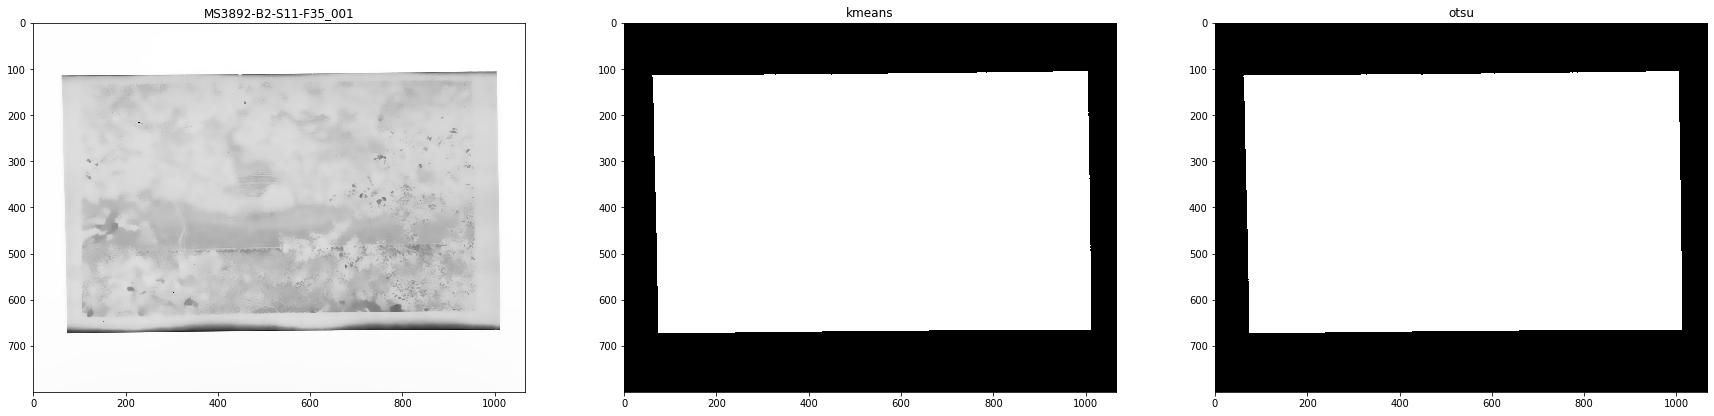

MS3892-B2-S11-F35_002


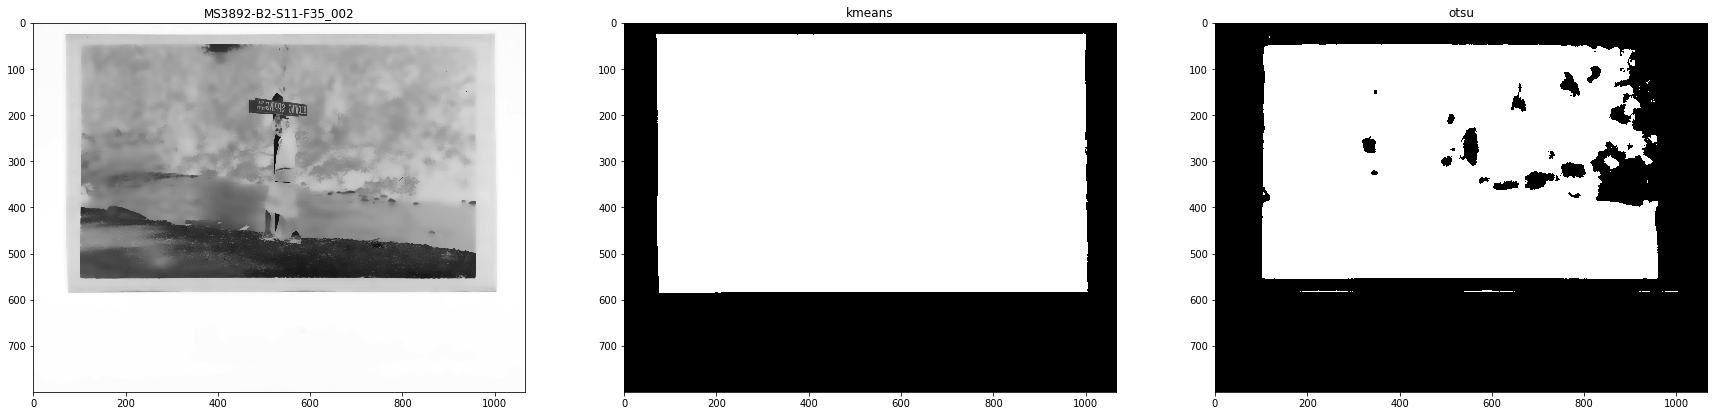

MS3892-B2-S11-F35_003


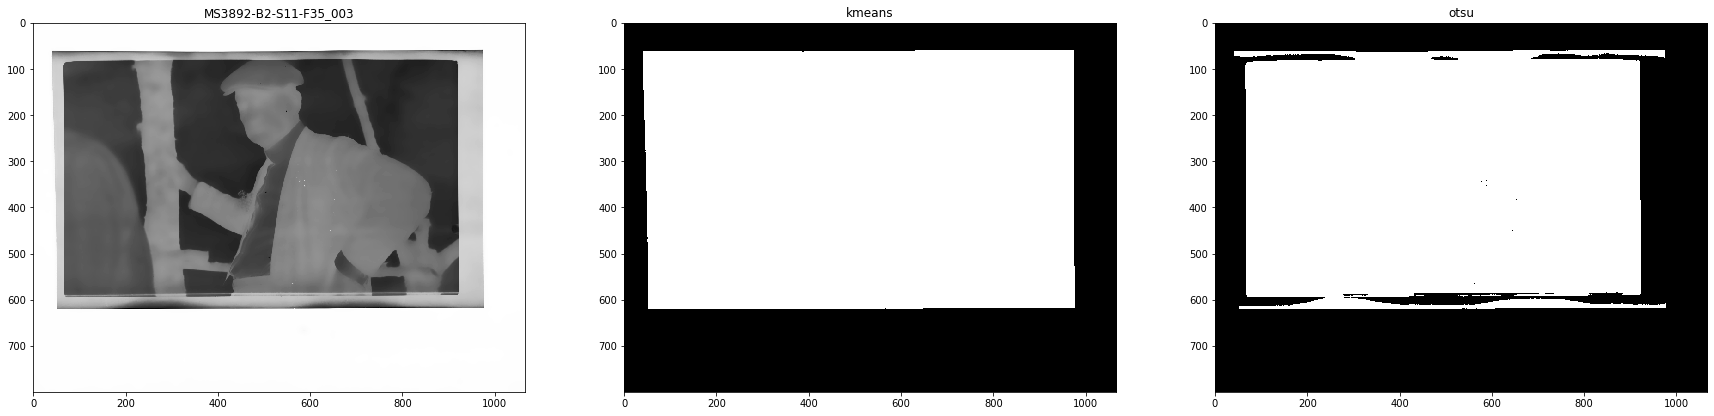

MS3892-B2-S11-F35_004


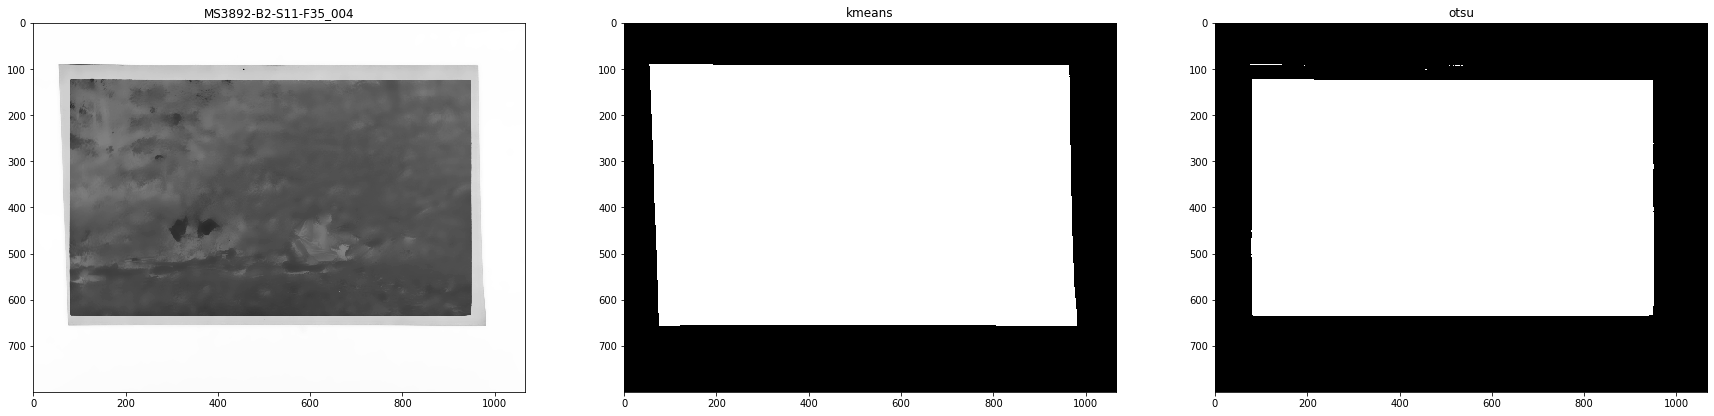

MS3892-B2-S11-F35_005


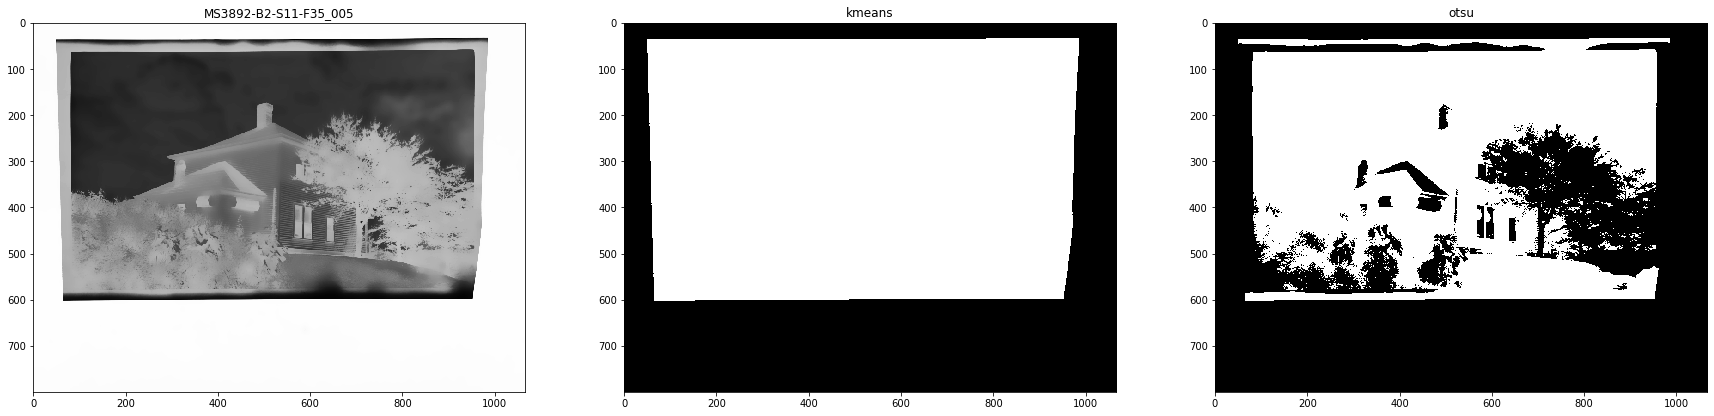

MS3892-B2-S11-F35_006


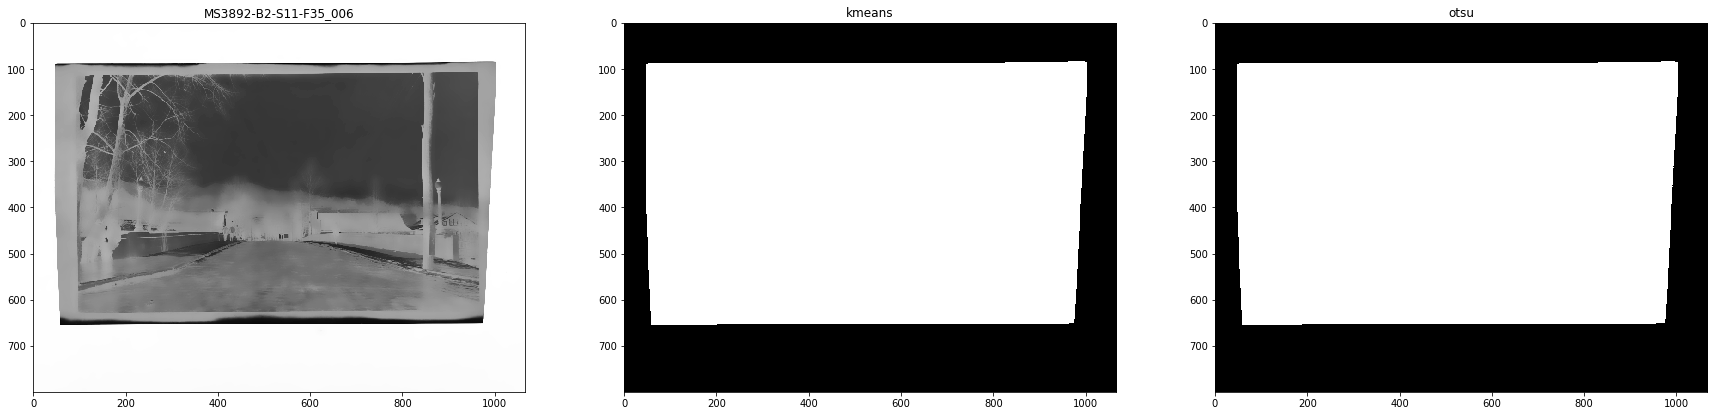

MS3892-B2-S11-F35_007


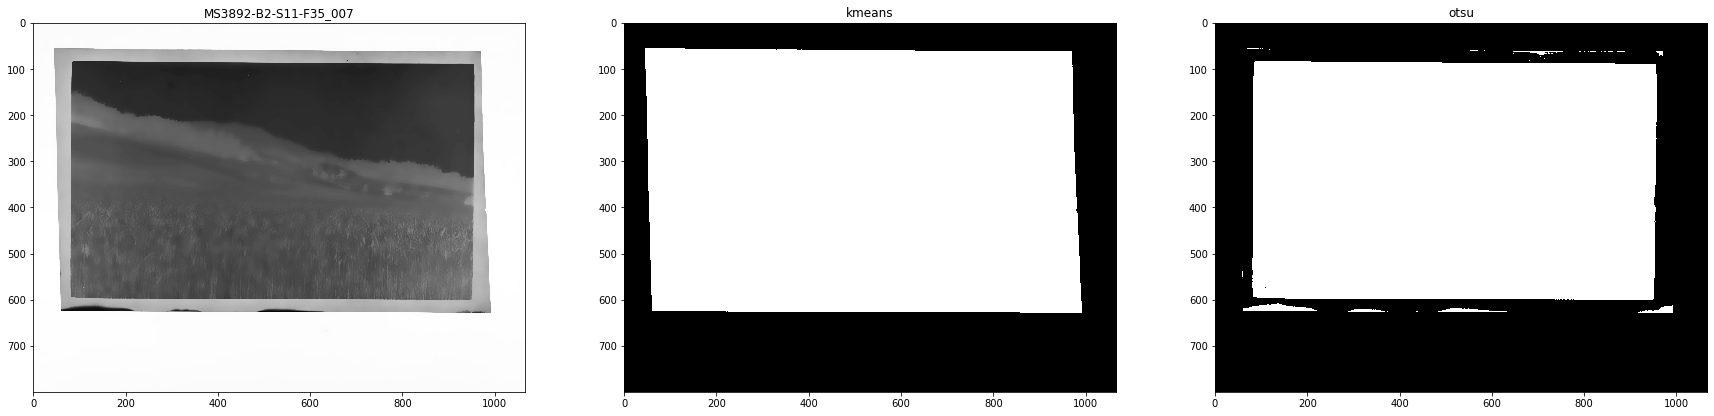

MS3892-B2-S11-F35_008


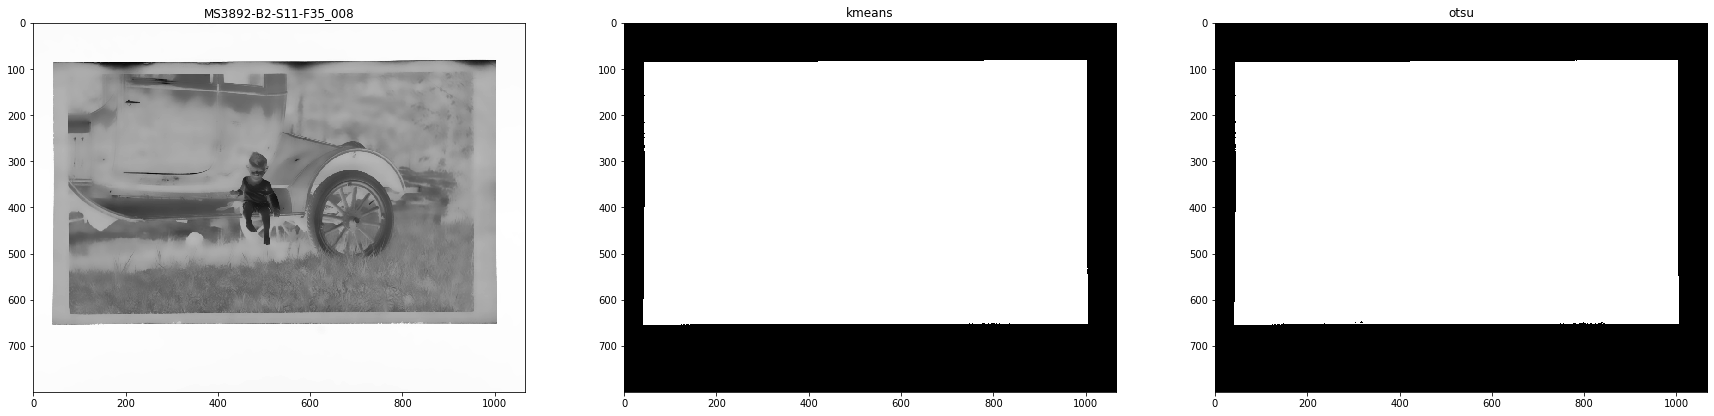

MS3892-B2-S11-F35_009


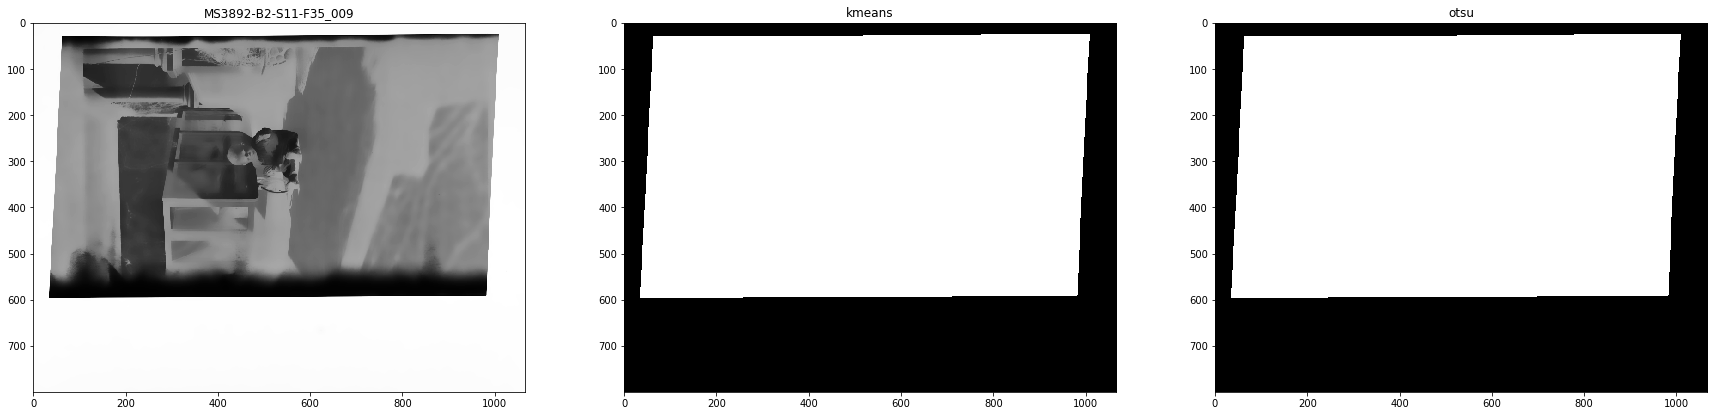

MS3892-B2-S11-F35_010


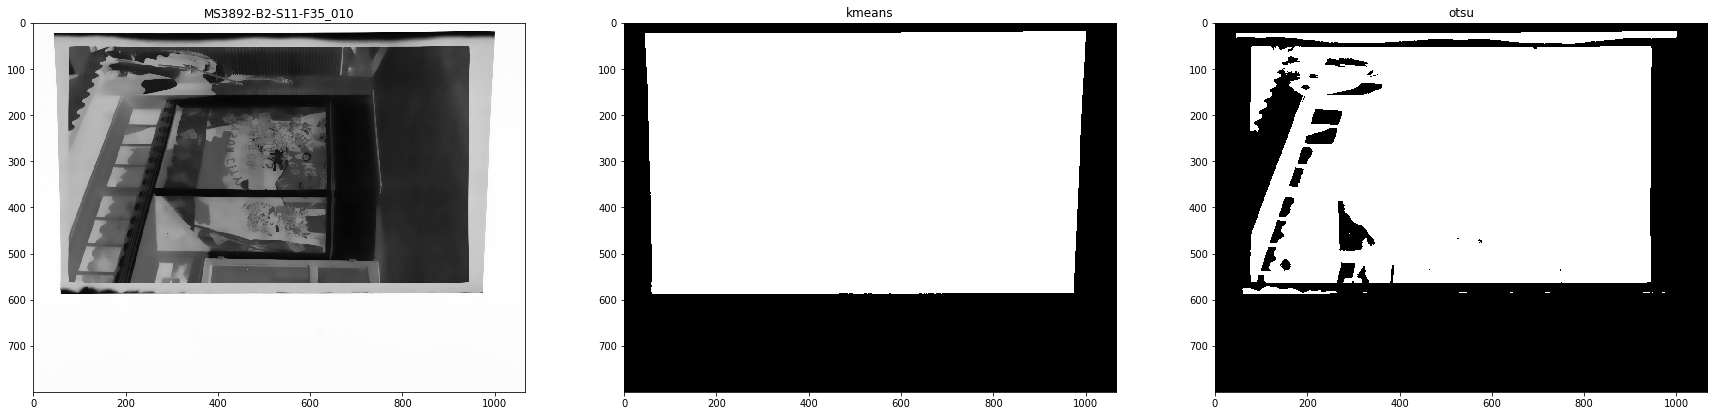

MS3892-B2-S11-F35_011


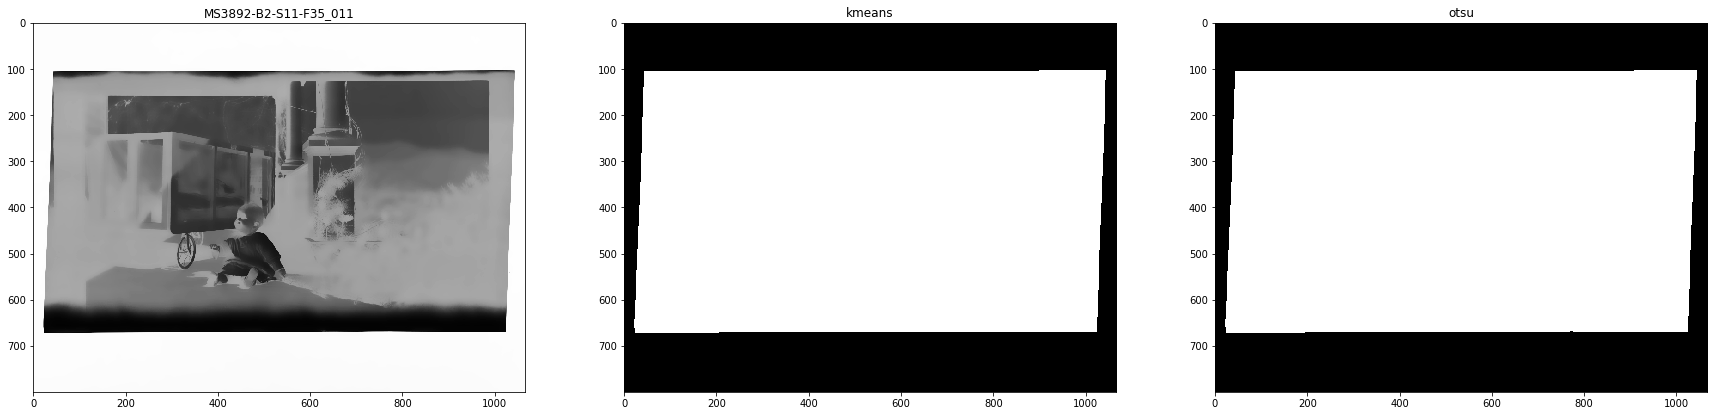

MS3892-B2-S11-F35_012


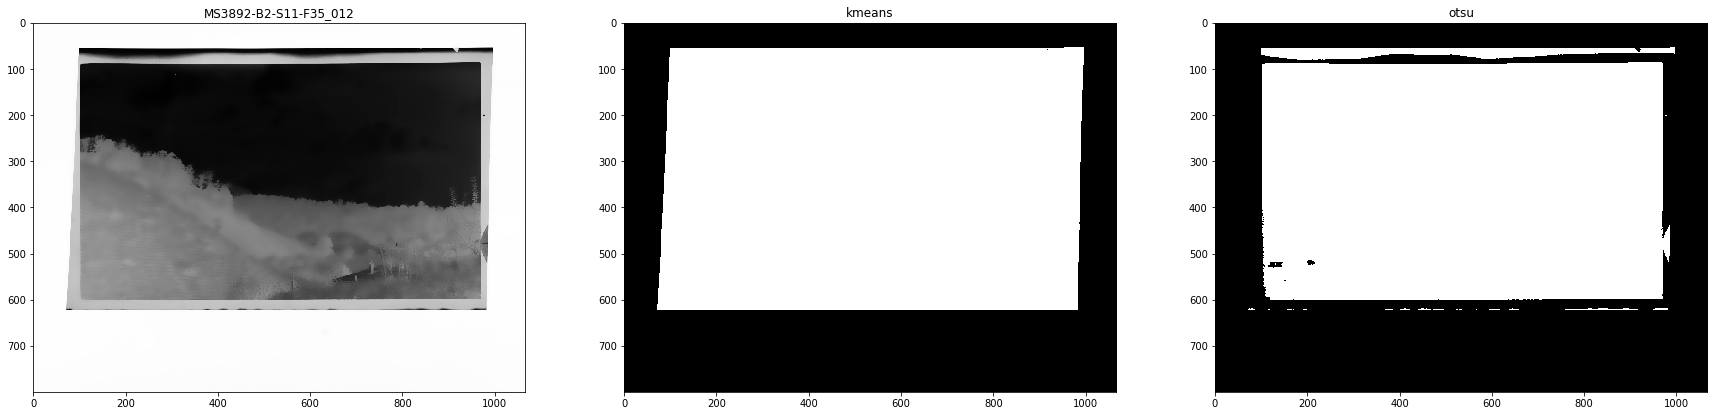

MS3892-B2-S11-F35_013


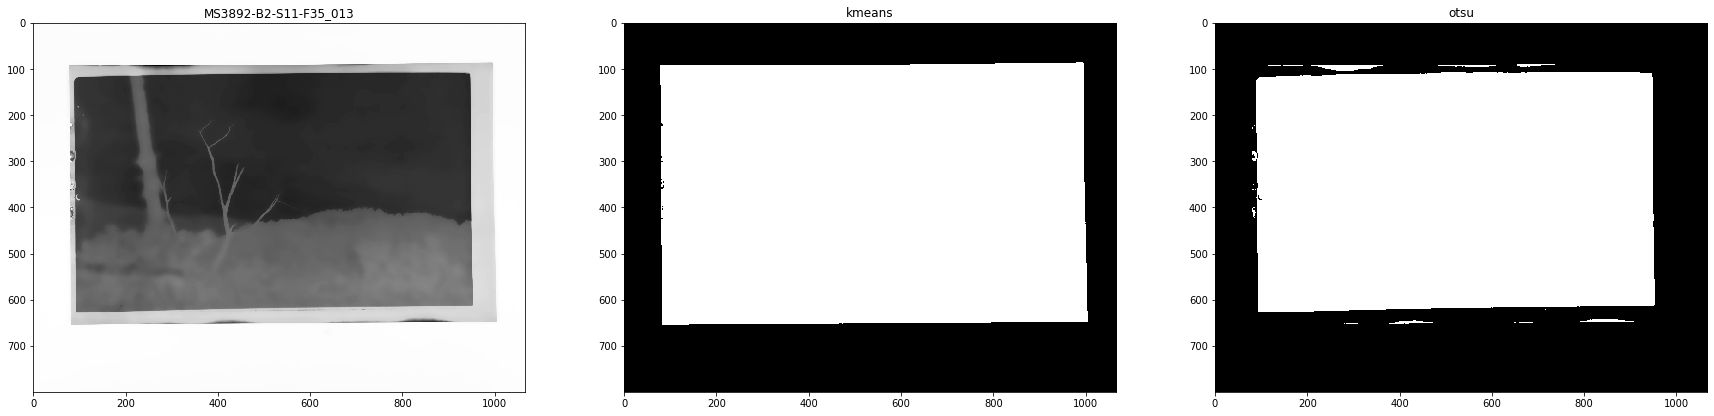

MS3892-B2-S11-F35_014


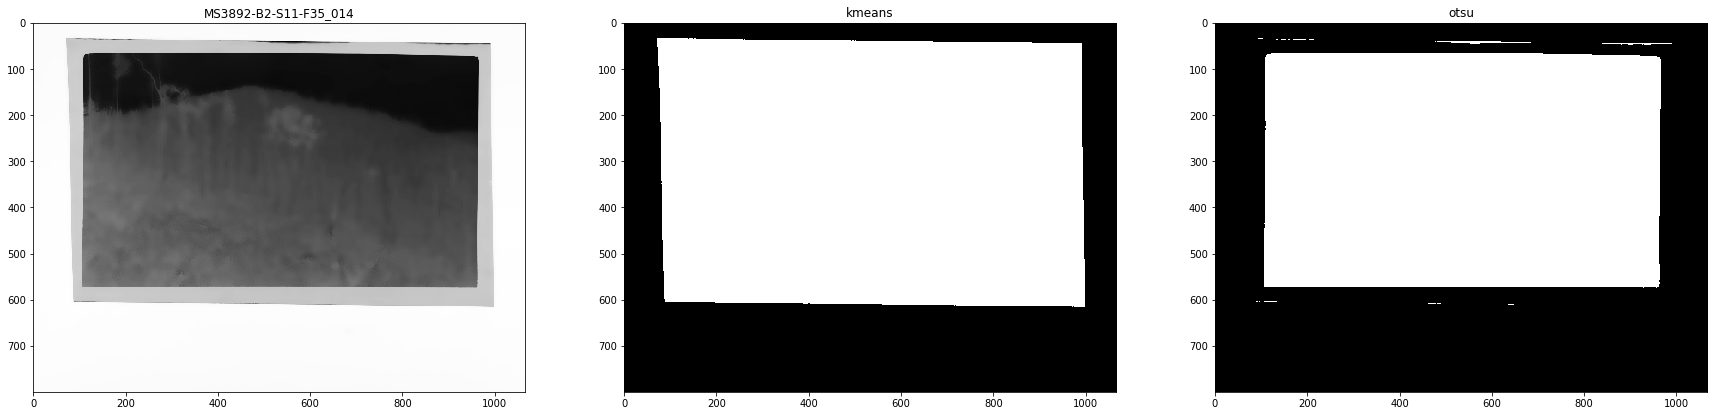

MS3892-B2-S11-F35_015


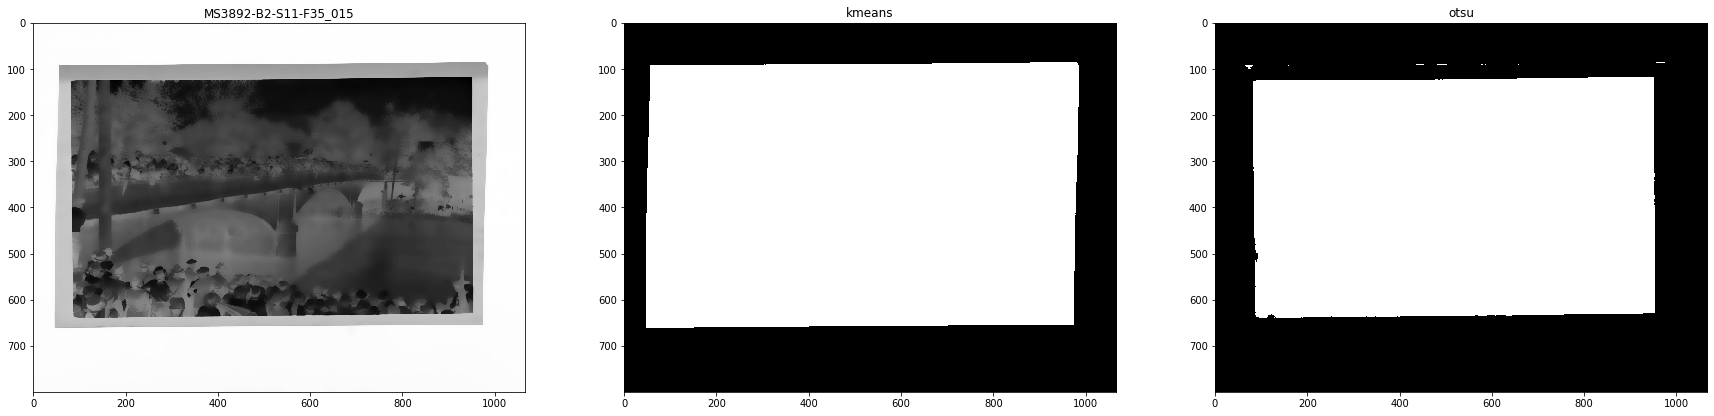

bennett_pack-film_-001


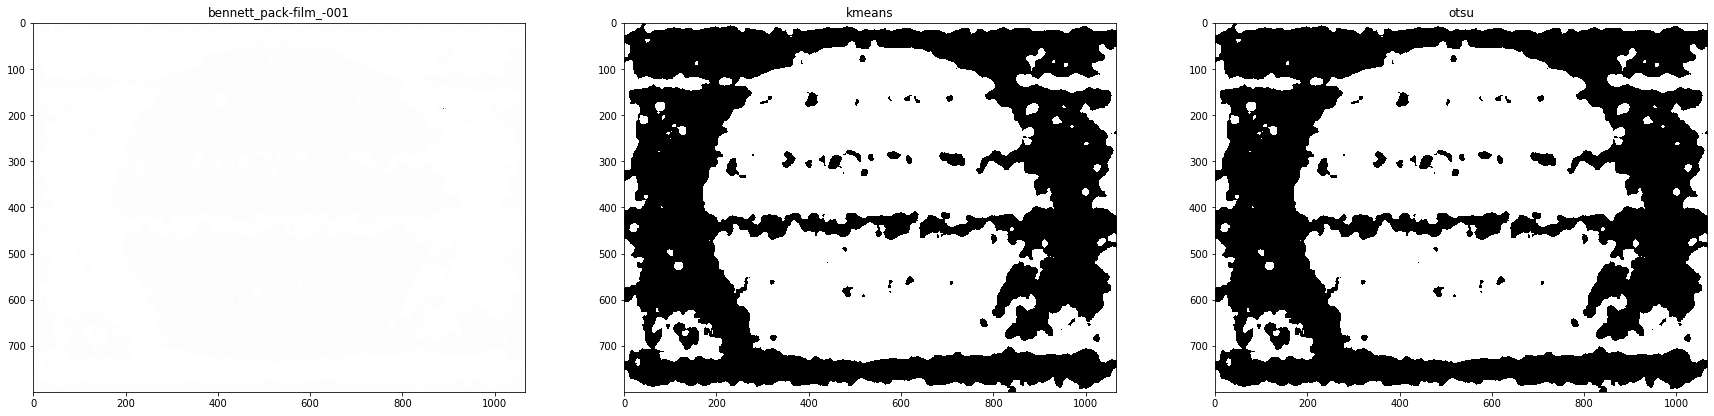

bennett_pack-film_-002


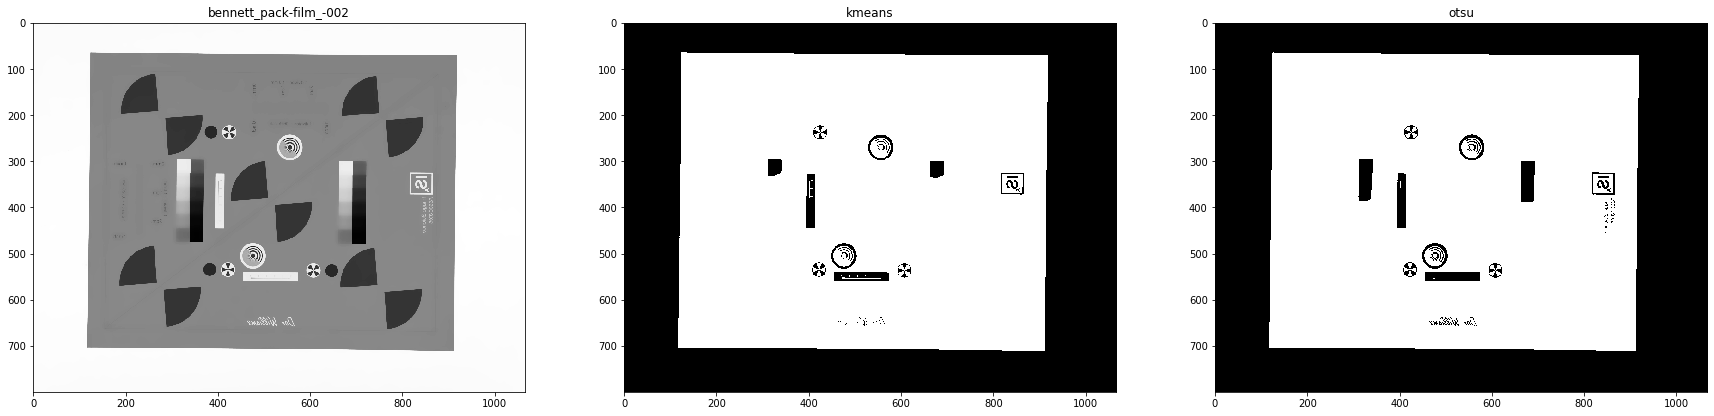

In [57]:
for image_path in image_paths_list:
    
    print(image_path.stem)
    blurred = blur_image(image_path)
    kmeans = threshold_kmeans(blurred.copy())
    otsu = threshold_otsu(blurred.copy())
    
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))
    axes[0].imshow(blurred, cmap='gray')
    axes[0].set_title(image_path.stem)
    axes[1].imshow(kmeans, cmap='gray')
    axes[1].set_title('kmeans')
    axes[2].imshow(otsu, cmap='gray')
    axes[2].set_title('otsu')
    plt.show()